## Diamonds regression

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm

In [3]:
df = pd.read_csv("diamonds.csv")
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
Y = df["price"]
X = sm.add_constant(df["carat"])
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                 3.041e+05
Date:                Sat, 11 Jan 2025   Prob (F-statistic):               0.00
Time:                        18:49:14   Log-Likelihood:            -4.7273e+05
No. Observations:               53940   AIC:                         9.455e+05
Df Residuals:                   53938   BIC:                         9.455e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2256.3606     13.055   -172.830      0.0

In [5]:
predictors = [
    "carat",
    "x"
]

Y = df["price"]
X = sm.add_constant(df[predictors])
X

,const,carat,x
0,1.0,0.23,3.95
1,1.0,0.21,3.89
2,1.0,0.23,4.05
3,1.0,0.29,4.20
4,1.0,0.31,4.34
...,...,...,...
53935,1.0,0.72,5.75
53936,1.0,0.72,5.69
53937,1.0,0.70,5.66
53938,1.0,0.86,6.15


In [6]:
predictors = [
    "carat",
    "x"
]

Y = df["price"]
X = sm.add_constant(df[predictors])
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                 1.570e+05
Date:                Sat, 11 Jan 2025   Prob (F-statistic):               0.00
Time:                        18:49:14   Log-Likelihood:            -4.7199e+05
No. Observations:               53940   AIC:                         9.440e+05
Df Residuals:                   53937   BIC:                         9.440e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1737.9497    103.623     16.772      0.0

In [7]:
predictors = [
    "carat",
    "x",
    "y",
    "z"
]

Y = df["price"]
X = sm.add_constant(df[predictors])
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                 7.892e+04
Date:                Sat, 11 Jan 2025   Prob (F-statistic):               0.00
Time:                        18:49:14   Log-Likelihood:            -4.7187e+05
No. Observations:               53940   AIC:                         9.437e+05
Df Residuals:                   53935   BIC:                         9.438e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1921.1740    104.373     18.407      0.0

# l3v3 - encoding categorical data

In [9]:
print(pd.unique(df["color"].sort_values()))

['D' 'E' 'F' 'G' 'H' 'I' 'J']


/var/folders/d5/37zfrn316_7_8btbyp21wlq40000gn/T/ipykernel_85085/2185394216.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df, x="color", y="price", order=color_order, palette="YlOrBr")


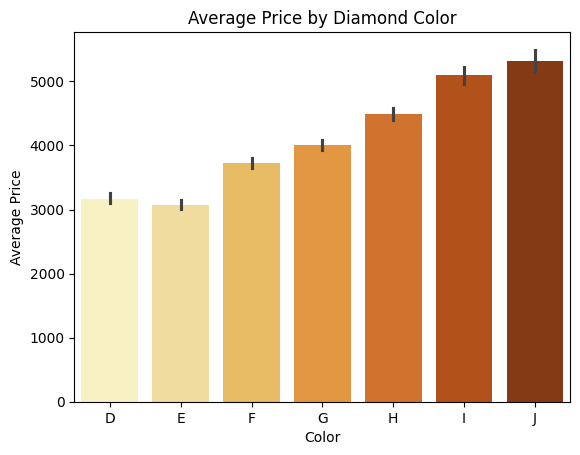

In [10]:
# Set the order of colors from D to J
color_order = ["D", "E", "F", "G", "H", "I", "J"]

# Create the barplot
sns.barplot(df, x="color", y="price", order=color_order, palette="YlOrBr")

# Customize plot
plt.title("Average Price by Diamond Color")
plt.xlabel("Color")
plt.ylabel("Average Price")
plt.show()

In [11]:
color_dummies = pd.get_dummies(df["color"], drop_first=True)

In [12]:
type(color_dummies)

pandas.core.frame.DataFrame

In [13]:
color_dummies.head()

,E,F,G,H,I,J
0,True,False,False,False,False,False
1,True,False,False,False,False,False
2,True,False,False,False,False,False
3,False,False,False,False,True,False
4,False,False,False,False,False,True


In [14]:
color_dummies = color_dummies.astype(int)
color_dummies.head()

,E,F,G,H,I,J
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


# l3v4 - modeling with categorical data

In [16]:
color_dummies["carat"] = df["carat"]
color_dummies.head()

,E,F,G,H,I,J,carat
0,1,0,0,0,0,0,0.23
1,1,0,0,0,0,0,0.21
2,1,0,0,0,0,0,0.23
3,0,0,0,0,1,0,0.29
4,0,0,0,0,0,1,0.31


In [17]:
Y = df["price"]
X = sm.add_constant(color_dummies)
X_test = X[:1000]
X_train = X[1000:]
Y_test = Y[:1000]
Y_train = Y[1000:]

In [18]:
print(len(X_test))
print(len(Y_test))

1000
1000


In [19]:
print(len(X_train))
print(len(Y_train))

52940
52940


In [20]:
model = sm.OLS(Y_train, X_train)

In [21]:
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                 4.846e+04
Date:                Sat, 11 Jan 2025   Prob (F-statistic):               0.00
Time:                        18:49:14   Log-Likelihood:            -4.6146e+05
No. Observations:               52940   AIC:                         9.229e+05
Df Residuals:                   52932   BIC:                         9.230e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2131.4370     20.364   -104.667      0.0

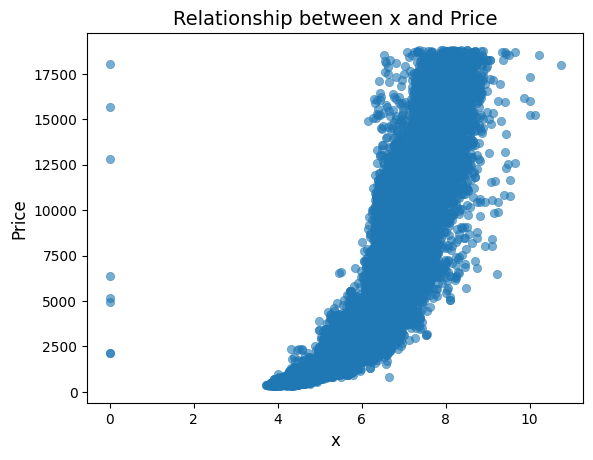

In [22]:
sns.scatterplot(data=df, x="x", y="price", alpha=0.6, edgecolor=None)

# Label and title
plt.title("Relationship between x and Price", fontsize=14)
plt.xlabel("x", fontsize=12)
plt.ylabel("Price", fontsize=12)

# Display the plot
plt.show()

/var/folders/d5/37zfrn316_7_8btbyp21wlq40000gn/T/ipykernel_85085/2593005274.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df, x="color", y="carat", order=color_order, palette="YlOrBr")


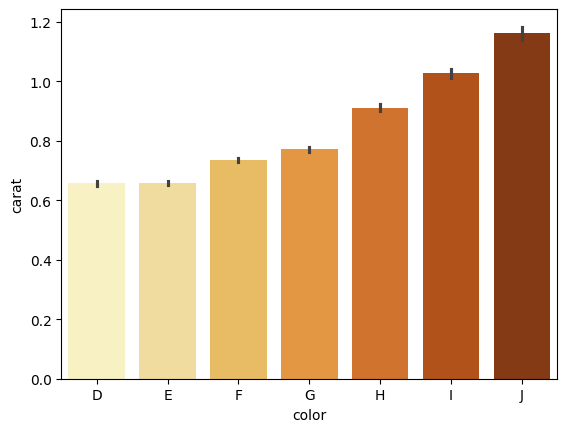

In [23]:
sns.barplot(df, x="color", y="carat", order=color_order, palette="YlOrBr")
plt.show()

# l3v5 - prediction

In [25]:
diamond1 = X_test.loc[0]
diamond1

const    1.00
E        1.00
F        0.00
G        0.00
H        0.00
I        0.00
J        0.00
carat    0.23
Name: 0, dtype: float64

In [26]:
results.predict(diamond1)

None   -364.609393
dtype: float64

In [27]:
Y_test.loc[0]

np.int64(326)

In [28]:
predicted = results.predict(X_test)

In [29]:
predicted.sample(10)

198    3432.525411
821    3504.224316
425    1914.039411
638    3677.453508
800    7633.610726
105    3839.033712
654    4958.446156
966    4076.378908
278    4337.742477
225    3685.450342
dtype: float64

In [30]:
predicted.describe()

count    1000.000000
mean     3102.850025
std      1641.194016
min     -2209.812958
25%      3026.107579
50%      3523.870137
75%      3868.451074
max      7633.610726
dtype: float64

# l3v6 - model errors

In [50]:
y_pred = results.predict(X_test)
y_pred.head()

0    -364.609393
1    -526.189598
2    -364.609393
3    -858.441203
4   -1563.492140
dtype: float64

In [52]:
y_actual = Y_test
y_actual.head()

0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64

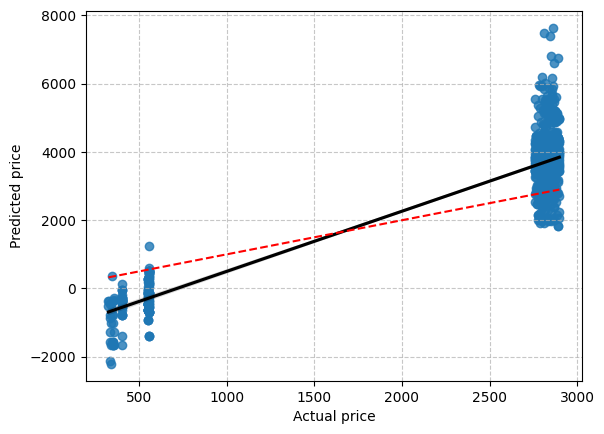

In [54]:
sns.regplot(x=y_actual, y=y_pred, line_kws={'color': 'black'})
plt.plot([min(y_actual), max(y_actual)], [min(y_actual), max(y_actual)], color='red', linestyle='--')
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.grid(alpha=0.7, linestyle="--")
plt.show()

In [ ]:
residuals = y_actual - y_pred
residuals.head()

In [ ]:
MSE = np.mean(residuals ** 2)
rMSE = np.sqrt(MSE)
rMSE

In [ ]:
print(f"${rMSE:.2f}")

In [ ]:
df[df["carat"] == 1.5]